# Computational Dynamics, Astrodynamics

## Exercise 3

#### Despoina Charitopoulou

### B. Molniya Orbit

### TASK1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

In [2]:
# Initial conditions
mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
H = 19000 #km 
J2=10**(-3)
a=R_earth + H
e=0.75
Ω=0
w=270
i=58
M=0
E=0
f=2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
T = 2*(np.pi)*np.sqrt(a**3/mu)

In [3]:
#Convert Keplerian elements to Cartesian.
def kep2cart(kep, GM):
    a,e,i,Om,w,f = kep
    p = a*(1-e*e)
    sqrt_GM = np.sqrt(GM/p)
    
    sini, cosi = np.sin(i), np.cos(i)
    sinOm, cosOm = np.sin(Om), np.cos(Om)
    sinw, cosw = np.sin(w), np. cos(w)
    sinf, cosf = np.sin(f), np.cos(f)
    
    rx = p*cosf/(1+e*cosf)
    ry = p*sinf/(1+e*cosf)
    v_x = -sqrt_GM*sinf
    v_y = sqrt_GM*(e+cosf)
    
    R11 = cosOm*cosw - sinOm*cosi*sinw
    R12 = -cosOm*sinw - cosw*cosi*sinOm
    R13 = sini*sinOm
    
    R21 = sinOm*cosw + cosOm*cosi*sinw
    R22 = -sinOm*sinw + cosOm*cosi*cosw
    R23 = -sini*cosOm
    
    R31 = sini*sinw
    R32 = sini*cosw
    R33 = cosi
    
    x = R11*rx + R12*ry
    y = R21*rx + R22*ry
    z = R31*rx + R32*ry
    vx = R11*v_x + R12*v_y
    vy = R21*v_x + R22*v_y
    vz = R31*v_x + R32*v_y
    
    return [x,y,z,vx,vy,vz]

In [4]:
#Convert Cartesian elements to Keplerian.
def cart2kep(cart, GM):
    x,y,z,vx,vy,vz = cart
    eps = 1e-14
    r = np.sqrt(x*x+y*y+z*z)
    rx = x
    ry = y 
    rz = z
    v = np.sqrt(vx*vx+vy*vy+vz*vz)
    E = (1/2)*v*v  - (mu/r)
    a = -mu/(2*E)
    hx = y*vz - z*vy
    hy = -x*vz + z*vx
    hz = x*vy - y*vx
    h = np.sqrt(hx*hx+hy*hy+hz*hz)
    i = np.arccos(hz/h)
    ex = (1/mu)*((v*v-mu/r)*rx - (rx*vx + ry*vy + rz*vz)*vx)
    ey = (1/mu)*((v*v-mu/r)*ry - (rx*vx + ry*vy + rz*vz)*vy)
    ez = (1/mu)*((v*v-mu/r)*rz - (rx*vx + ry*vy + rz*vz)*vz)
    e = np.sqrt(ex*ex+ey*ey+ez*ez)
    nx = -hy
    ny = hx
    nz = 0
    n = np.sqrt(nx*nx+ny*ny+nz*nz)
    
    if ny>=0:
        Om = np.arccos(nx/n)
        
    if ny<0:
        Om = 2*np.pi - np.arccos(nx/n)
    
    if e>eps:
        if n>eps:
            w = np.arccos((nx*ex+ny*ey)/n*e)
        if ez<0:
            w = 2*np.pi - np.arccos((nx*ex+ny*ey)/n*e)
   
    v_r = (x*vx+y*vy+z*vz)/r
    
    
    if v_r>=0:
        f = np.arccos((ex*rx+ey*ry+ez*rz)/(e*r))
                      
    if v_r<0:
        f = 2*np.pi - np.arccos((ex*rx+ey*ry+ez*rz)/(e*r))        
     
        
    
    return [a,e,i,Om,w,f]

In [5]:
# right-hard side of perturbed two body problem in cartesian coordinates
def rhs_2bp_pert(t , X):
    x, y, z, vx, vy, vz = X
    mu = 398600.433
    R_earth = 6378 #km
    J2=10**(-3)
    
    r = np.sqrt(x**2+y**2+z**2)
    v = np.sqrt(vx**2+vy**2+vz**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    z_dot = vz
    
    px = (3/2)*((J2*mu*R_earth)/(r**4))*((x/r)*(5*(z**2/r**2)-1))
    py = (3/2)*((J2*mu*R_earth)/(r**4))*((y/r)*(5*(z**2/r**2)-1))
    pz = (3/2)*((J2*mu*R_earth)/(r**4))*((z/r)*(5*(z**2/r**2)-3))
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    vz_dot = - mu*z/r3 + pz 
    return [x_dot, y_dot, z_dot, vx_dot, vy_dot, vz_dot]

In [6]:
t0 = 0.0;
tmax = 1000*T;
IC = [ a , e, np.deg2rad(i), np.deg2rad(Ω), np.deg2rad(w), f ];
ICCAR = kep2cart(IC,mu);

In [7]:
# solve 2-body problem in cartesian coordinates
sol = solve_ivp(rhs_2bp_pert, [t0, tmax], ICCAR ,t_eval=np.linspace(0,tmax,5000),method='DOP853',atol=1e-13,rtol=1e-13)


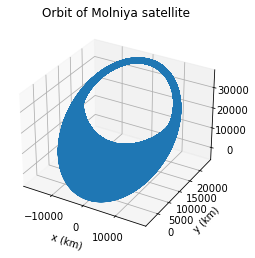

In [8]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
plt.figure(1)
ax.plot(sol.y[0],sol.y[1],sol.y[2])
plt.title('Orbit of Molniya satellite')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.grid()
plt.show()

### TASK 2

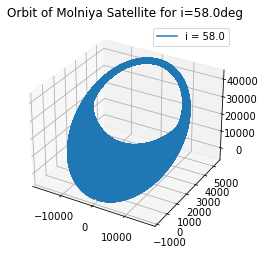

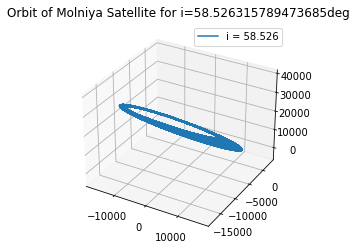

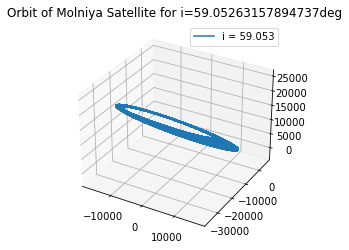

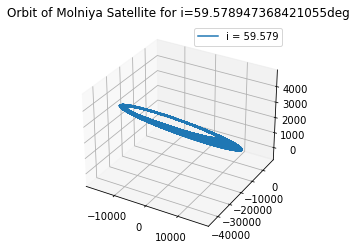

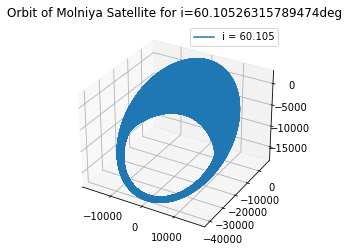

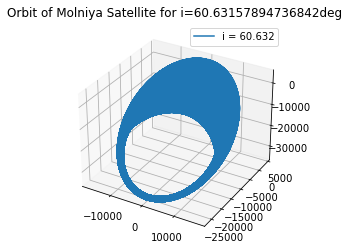

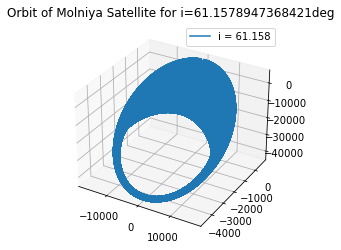

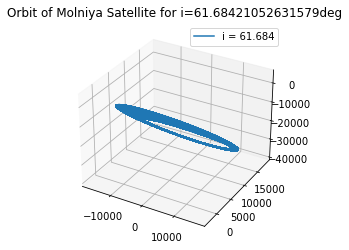

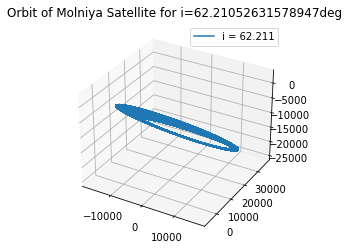

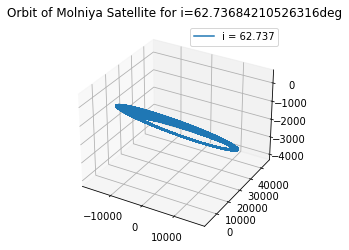

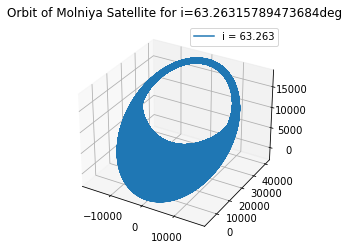

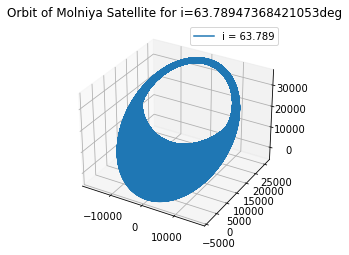

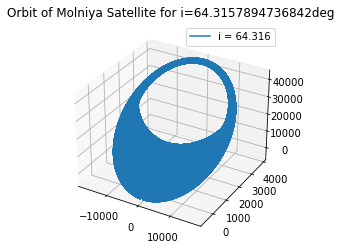

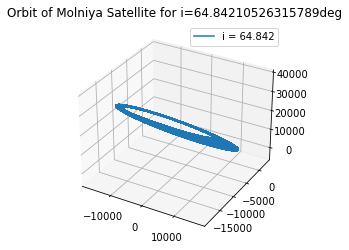

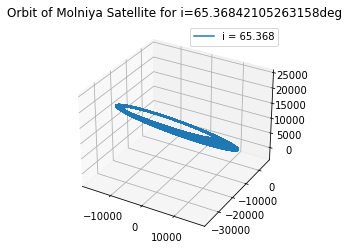

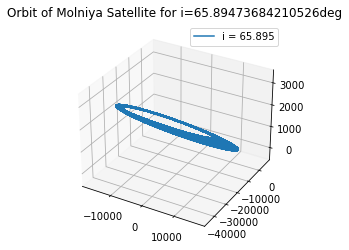

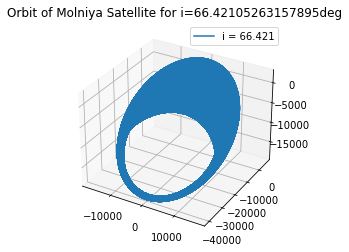

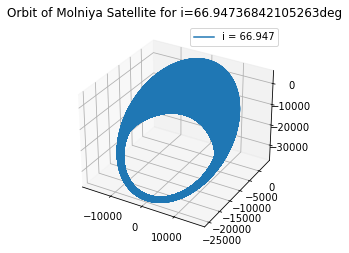

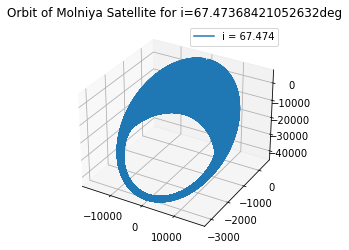

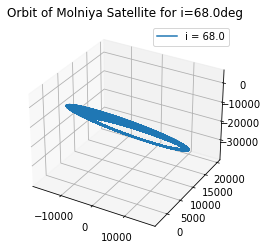

In [9]:
i1=np.linspace(58,68,20)
for j in i1:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    IC[2]=j
    ICCAR=kep2cart(IC,mu)
    sol=solve_ivp(rhs_2bp_pert,[t0,tmax],ICCAR,t_eval=np.linspace(0,tmax,5000),method='DOP853',atol=1e-13,rtol=1e-13)
    ax.plot(sol.y[0],sol.y[1],sol.y[2],label='i = '+str(np.round(j,3)))
    plt.legend()
    plt.title("Orbit of Molniya Satellite for i="+str(j)+"deg")

### TASK 3

In [18]:
%reset -f


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from numpy import diff

# Initial conditions
mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
H = 19000 #km 
J2=10**(-3)
a0=R_earth + H
e0=0.75
Ω0=0
w0=270
i0=58
M=0
E=0
f0=2*np.arctan(np.sqrt((1+e0)/(1-e0))*np.tan(E/2))
T = 2*(np.pi)*np.sqrt(a0**3/mu)


In [19]:
#Convert Keplerian elements to Cartesian.
def kep2cart(kep, GM):
    a,e,i,Om,w,f = kep
    p = a*(1-e*e)
    sqrt_GM = np.sqrt(GM/p)
    
    sini, cosi = np.sin(i), np.cos(i)
    sinOm, cosOm = np.sin(Om), np.cos(Om)
    sinw, cosw = np.sin(w), np. cos(w)
    sinf, cosf = np.sin(f), np.cos(f)
    
    rx = p*cosf/(1+e*cosf)
    ry = p*sinf/(1+e*cosf)
    v_x = -sqrt_GM*sinf
    v_y = sqrt_GM*(e+cosf)
    
    R11 = cosOm*cosw - sinOm*cosi*sinw
    R12 = -cosOm*sinw - cosw*cosi*sinOm
    R13 = sini*sinOm
    
    R21 = sinOm*cosw + cosOm*cosi*sinw
    R22 = -sinOm*sinw + cosOm*cosi*cosw
    R23 = -sini*cosOm
    
    R31 = sini*sinw
    R32 = sini*cosw
    R33 = cosi
    
    x = R11*rx + R12*ry
    y = R21*rx + R22*ry
    z = R31*rx + R32*ry
    vx = R11*v_x + R12*v_y
    vy = R21*v_x + R22*v_y
    vz = R31*v_x + R32*v_y
    
    return [x,y,z,vx,vy,vz]

#Convert Cartesian elements to Keplerian.
def cart2kep(cart, mu):
    x,y,z,vx,vy,vz = cart
    eps = 1e-14
    r = np.sqrt(x*x+y*y+z*z)
    rx = x
    ry = y 
    rz = z
    v = np.sqrt(vx*vx+vy*vy+vz*vz)
    E = (1/2)*v*v  - (mu/r)
    a = -mu/(2*E)
    hx = y*vz - z*vy
    hy = -x*vz + z*vx
    hz = x*vy - y*vx
    h = np.sqrt(hx*hx+hy*hy+hz*hz)
    i = np.arccos(hz/h)
    ex = (1/mu)*((v*v-mu/r)*rx - (rx*vx + ry*vy + rz*vz)*vx)
    ey = (1/mu)*((v*v-mu/r)*ry - (rx*vx + ry*vy + rz*vz)*vy)
    ez = (1/mu)*((v*v-mu/r)*rz - (rx*vx + ry*vy + rz*vz)*vz)
    e = np.sqrt(ex*ex+ey*ey+ez*ez)
    nx = -hy
    ny = hx
    nz = 0
    n = np.sqrt(nx*nx+ny*ny+nz*nz)
    
    if ny>=0:
        Om = np.arccos(nx/n)
    if ny<0:
        Om = 2*np.pi - np.arccos(nx/n)
    
    if ez>0:
        w = np.arccos((nx*ex+ny*ey)/n*e)
    else:
        w = 2*np.pi - np.arccos((nx*ex+ny*ey)/n*e)
   
    v_r = (x*vx+y*vy+z*vz)/r

    if v_r>=0:
        f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))
                      
    if v_r<0:
        f = float(2*np.pi - np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))       
     
    return [a,e,i,Om,w,f]


In [20]:
# right-hard side of perturbed two body problem in cartesian coordinates
def rhs_2bp_pert(t , X):
    x, y, z, vx, vy, vz = X
    mu = 398600.433
    R_earth = 6378 #km
    J2=10**(-3)
    
    r = np.sqrt(x**2+y**2+z**2)
    v = np.sqrt(vx**2+vy**2+vz**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    z_dot = vz
    
    px = (3/2)*((J2*mu*R_earth)/(r**4))*((x/r)*(5*(z**2/r**2)-1))
    py = (3/2)*((J2*mu*R_earth)/(r**4))*((y/r)*(5*(z**2/r**2)-1))
    pz = (3/2)*((J2*mu*R_earth)/(r**4))*((z/r)*(5*(z**2/r**2)-3))
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    vz_dot = - mu*z/r3 + pz 
    return [x_dot, y_dot, z_dot, vx_dot, vy_dot, vz_dot]

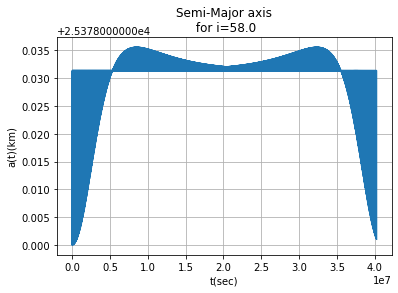

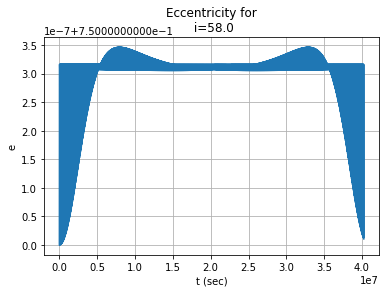

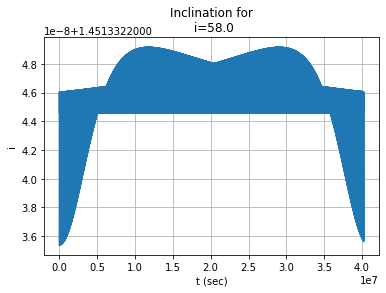

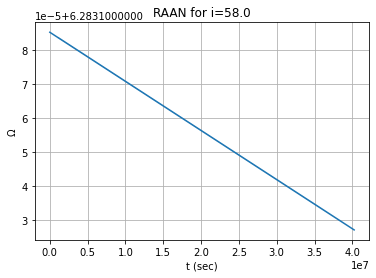

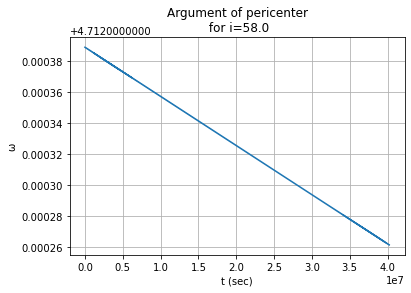

i = 58.0
da/dt = [ 6.22712001e-06  6.00753932e-09  6.22620398e-09 ... -6.14329441e-09
 -6.56044891e-09 -6.02311192e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 6.12840850e-11  1.12873722e-12  3.54263850e-13 ... -3.48190529e-13
 -1.10996041e-12 -5.92079721e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 2.11608174e-12 -2.18059860e-13 -5.81732607e-14 ...  5.71199233e-14
  2.12888835e-13 -2.06082477e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-5.92500512e-12  0.00000000e+00  0.00000000e+00 ... -2.00632846e-13
 -3.37799875e-13 -4.28908502e-12]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72985280e-08 -7.72985307e-08 ... -7.72985306e-08
 -7.72985280e-08 -7.72986931e-08] 

dw/dt = [-1.25900701e-11 -5.18576598e-13  1.96435388e-13 ...  1.98760050e-13
 -4.84746021e-13 -4.25760753e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361405e-08 6.76361415e-08 ... 6.76361413e-08
 6.76361403e-08 6.76363538e-08] 



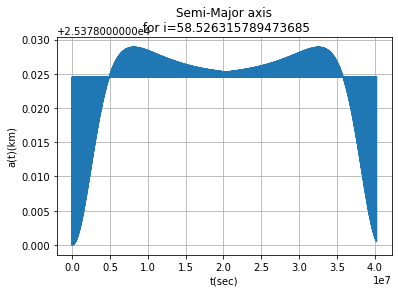

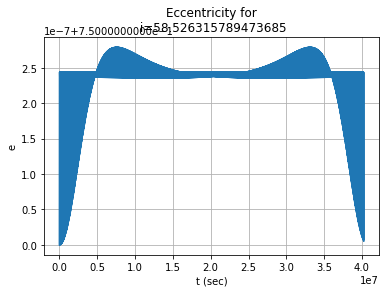

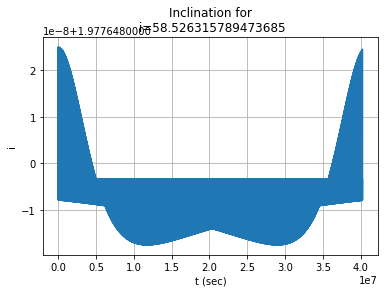

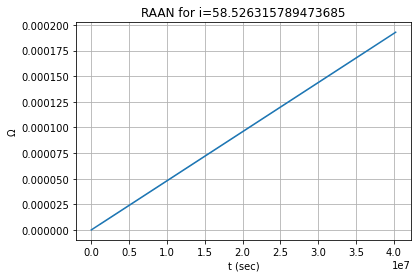

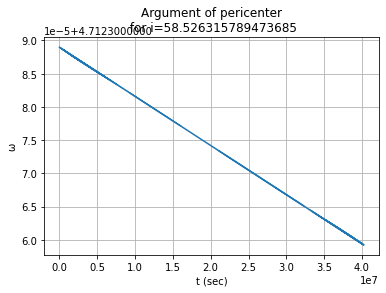

i = 58.526315789473685
da/dt = [ 4.87359966e-06 -2.31826675e-10  4.40775973e-09 ... -4.36395432e-09
 -2.76696003e-10 -4.76900728e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 4.72136205e-11  9.03967713e-13  2.92519303e-13 ... -2.88707714e-13
 -8.93034101e-13 -4.61567101e-11]
From the averaged theory : de/dt = 0 

di/dt = [-6.49892063e-12  6.69706693e-13  1.78662014e-13 ... -1.76197767e-13
 -6.57322640e-13  6.39169211e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [1.67584452e-11 1.01657017e-12 9.61495968e-13 ... 6.66965282e-13
 1.12401853e-12 1.48041700e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72985630e-08 -7.72985655e-08 ... -7.72985641e-08
 -7.72985617e-08 -7.72986944e-08] 

dw/dt = [-3.26041538e-12 -2.80102362e-13  2.78688141e-13 ...  2.79683340e-13
 -2.58504642e-13  1.43607392e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361876e-08 6.76361886e-08 ... 6.76361856e-08
 6.76361845e-08 6.76363544e-08] 



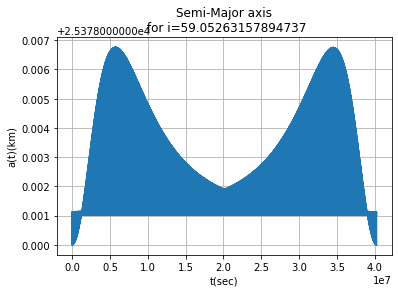

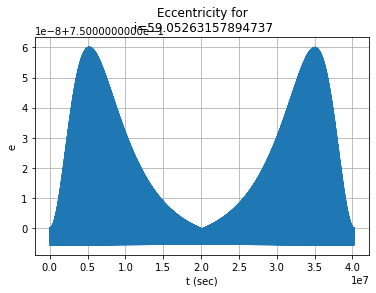

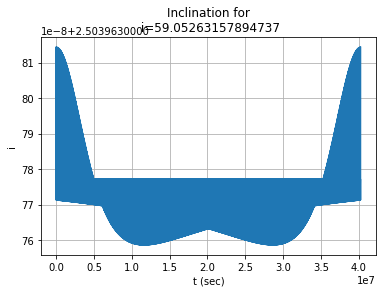

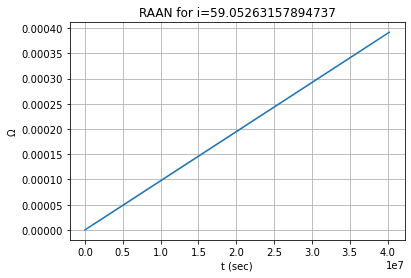

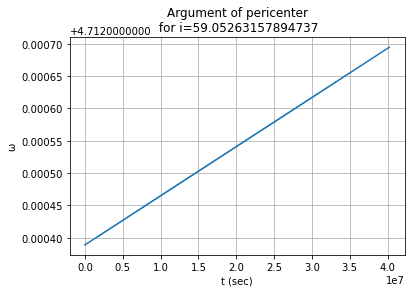

i = 59.05263157894737
da/dt = [ 2.25003593e-07 -2.16607512e-08 -1.83849249e-09 ...  1.84120330e-09
  2.16515577e-08 -2.24957929e-07]
From the averaged theory : da/dt = 0 

de/dt = [-1.11073789e-12  1.31994371e-13  8.04991038e-14 ... -8.05625839e-14
 -1.31988610e-13  1.11132954e-12]
From the averaged theory : de/dt = 0 

di/dt = [-8.55373673e-12  8.81454034e-13  2.35150845e-13 ... -2.35418538e-13
 -8.81196405e-13  8.55388320e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [3.42934465e-11 2.23073807e-12 1.41435936e-12 ... 1.35926375e-12
 2.29869507e-12 3.40433568e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72986835e-08 -7.72986850e-08 ... -7.72986791e-08
 -7.72986776e-08 -7.72986926e-08] 

dw/dt = [2.87818622e-11 5.38934558e-13 5.61125230e-13 ... 5.60710269e-13
 5.37934238e-13 2.87149725e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76363493e-08 6.76363505e-08 ... 6.76363376e-08
 6.76363364e-08 6.76363482e-08] 



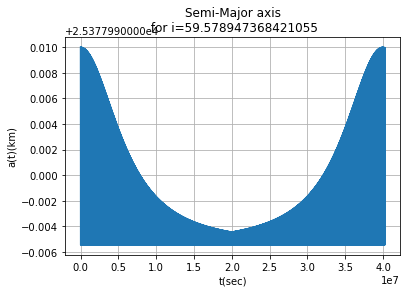

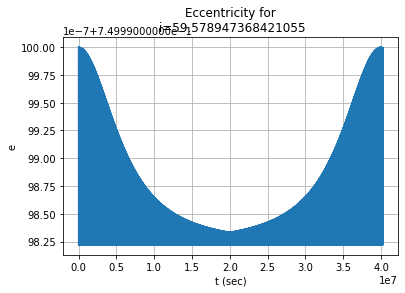

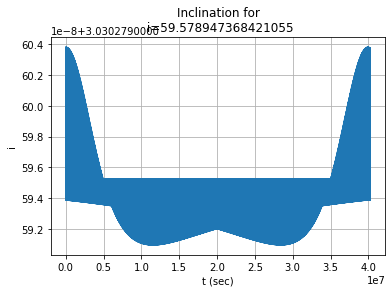

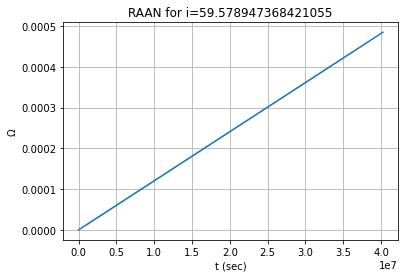

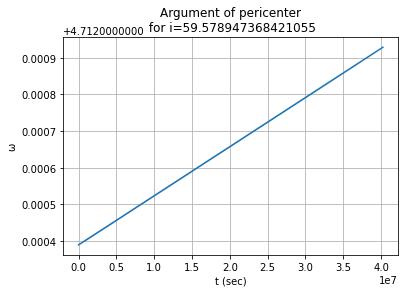

i = 59.578947368421055
da/dt = [-3.02624757e-06 -3.66482050e-08 -6.20685875e-09 ...  6.27219003e-09
  3.73058458e-08  3.01863135e-06]
From the averaged theory : da/dt = 0 

de/dt = [-3.49090913e-11 -4.07930265e-13 -6.78039849e-14 ...  6.85040762e-14
  4.15324838e-13  3.48210511e-11]
From the averaged theory : de/dt = 0 

di/dt = [-1.97418368e-12  2.03437978e-13  5.42724118e-14 ... -5.49070364e-14
 -2.06018149e-13  1.96637933e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [4.23130000e-11 2.90763899e-12 1.71422839e-12 ... 1.68527069e-12
 2.85759721e-12 4.55635091e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72987677e-08 -7.72987686e-08 ... -7.72987595e-08
 -7.72987586e-08 -7.72986896e-08] 

dw/dt = [5.11924143e-11 1.11177403e-12 7.58688781e-13 ... 7.59898169e-13
 1.11348861e-12 5.51489426e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364624e-08 6.76364637e-08 ... 6.76364439e-08
 6.76364426e-08 6.76363416e-08] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_30076/2537125485.py:76: RuntimeWarning: invalid value encountered in arccos
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


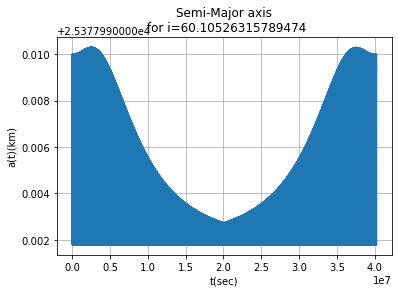

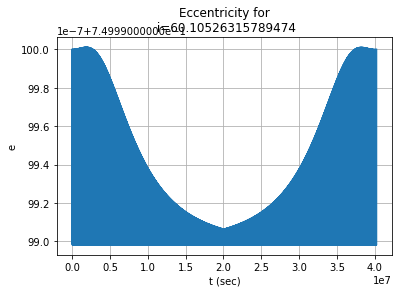

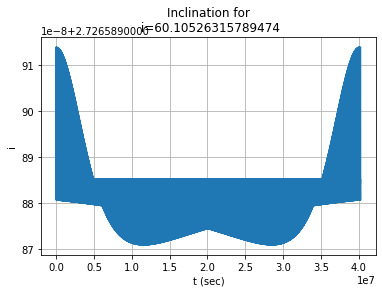

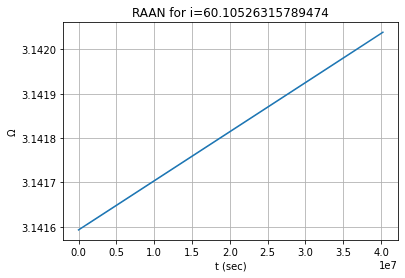

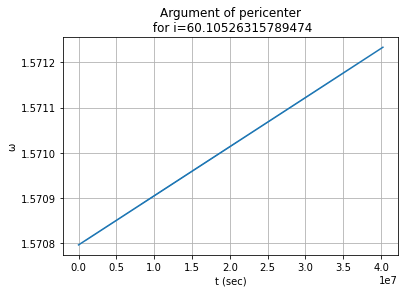

i = 60.10526315789474
da/dt = [-1.59826263e-06 -3.00654390e-08 -4.28824560e-09 ...  4.31741208e-09
  3.03974483e-08  1.59850092e-06]
From the averaged theory : da/dt = 0 

de/dt = [-2.00644811e-11 -1.70789575e-13 -2.66285415e-15 ...  2.65855004e-15
  1.73402810e-13  2.00661436e-11]
From the averaged theory : de/dt = 0 

di/dt = [-6.59816252e-12  6.79934232e-13  1.81390070e-13 ... -1.82667795e-13
 -6.84666989e-13  6.59397142e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [3.88528569e-11 2.72784808e-12 1.45213042e-12 ... 1.55014690e-12
 2.62549835e-12 4.05599241e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72987307e-08 7.72987319e-08 ... 7.72987242e-08
 7.72987230e-08 7.72986908e-08] 

dw/dt = [4.13494517e-11 8.60178879e-13 6.71917020e-13 ... 6.72102825e-13
 8.58814057e-13 4.27911129e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364128e-08 6.76364140e-08 ... 6.76363972e-08
 6.76363960e-08 6.76363444e-08] 



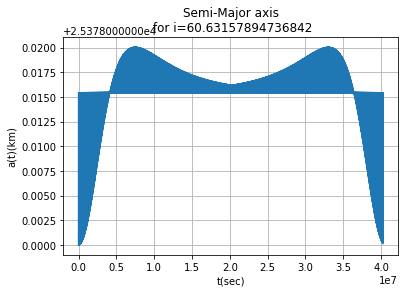

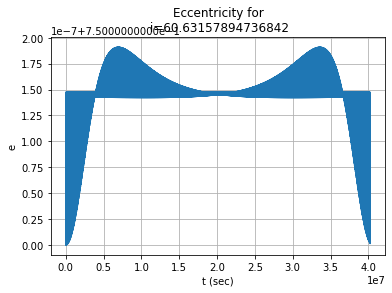

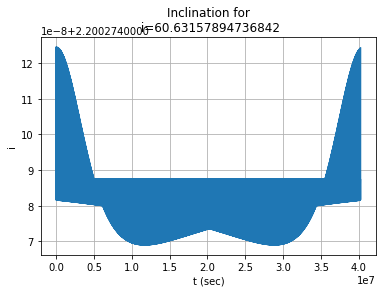

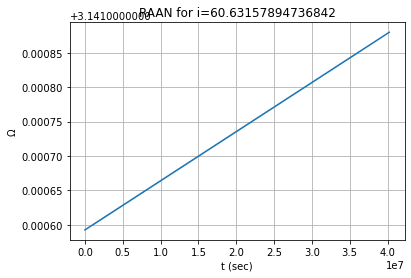

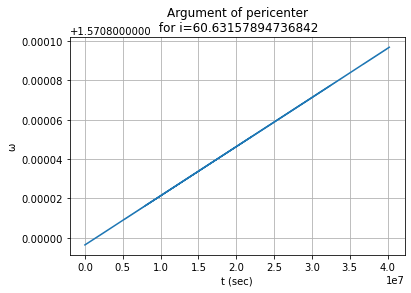

i = 60.63157894736842
da/dt = [ 3.06751739e-06 -8.55734560e-09  1.98106004e-09 ... -1.97135090e-09
  8.18003011e-09 -3.03705718e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.84385504e-11  6.04040571e-13  2.10147624e-13 ... -2.08524466e-13
 -6.00324755e-13 -2.81362333e-11]
From the averaged theory : de/dt = 0 

di/dt = [-8.51014893e-12  8.76961866e-13  2.33952668e-13 ... -2.32078018e-13
 -8.66902519e-13  8.45051302e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.51376678e-11 1.68893386e-12 9.64135697e-13 ... 9.93624905e-13
 1.67682293e-12 2.31527947e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72986098e-08 7.72986119e-08 ... 7.72986087e-08
 7.72986067e-08 7.72986945e-08] 

dw/dt = [9.18871119e-12 3.81102322e-14 3.88427565e-13 ... 3.88361790e-13
 4.72824914e-14 1.05856353e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76362504e-08 6.76362515e-08 ... 6.76362446e-08
 6.76362435e-08 6.76363532e-08] 



C:\Users\des_p\AppData\Local\Temp/ipykernel_30076/2537125485.py:76: RuntimeWarning: invalid value encountered in arccos
  f = float(np.arccos((ex*rx+ey*ry+ez*rz)/(e*r)))


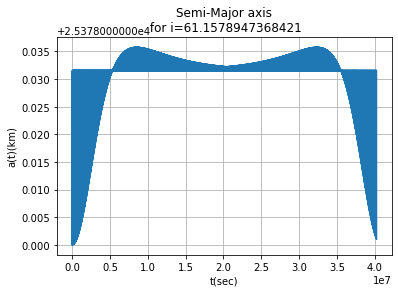

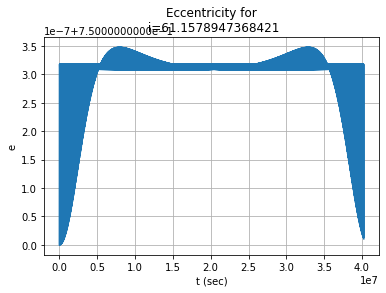

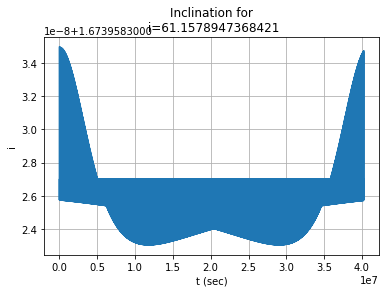

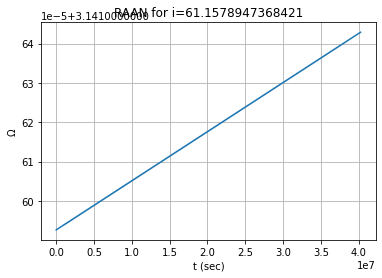

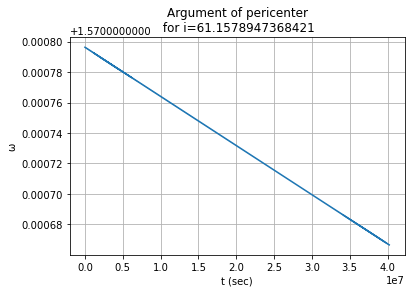

i = 61.1578947368421
da/dt = [ 6.26133292e-06  6.16528679e-09  6.27218641e-09 ... -6.18778547e-09
 -6.71922776e-09 -6.05422581e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 6.16397441e-11  1.13441920e-12  3.55823969e-13 ... -3.49688889e-13
 -1.11541778e-12 -5.95317948e-11]
From the averaged theory : de/dt = 0 

di/dt = [-1.83176237e-12  1.88761092e-13  5.03570392e-14 ... -4.94397559e-14
 -1.84259831e-13  1.78343250e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 4.18961132e-12  1.73539381e-12 -1.73539381e-12 ...  1.73707916e-13
  2.91558713e-13  3.70244952e-12]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72985271e-08 7.72985298e-08 ... 7.72985297e-08
 7.72985271e-08 7.72986930e-08] 

dw/dt = [-1.28258972e-11 -5.24603987e-13  1.94357319e-13 ...  1.96701934e-13
 -4.90411114e-13 -4.38876969e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361393e-08 6.76361403e-08 ... 6.76361402e-08
 6.76361392e-08 6.76363538e-08] 



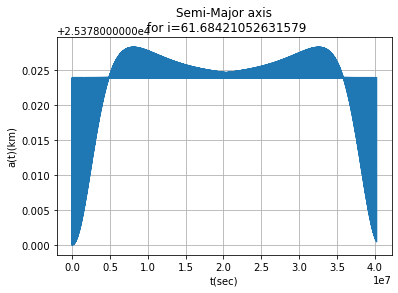

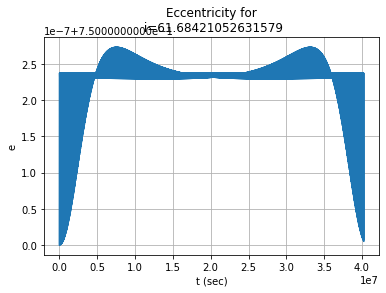

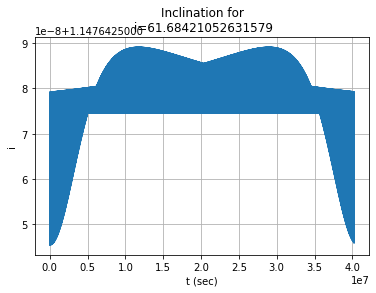

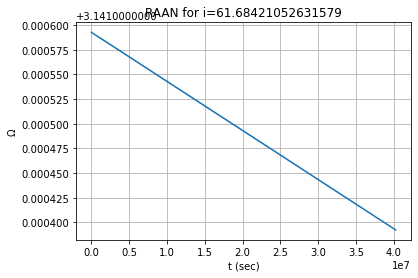

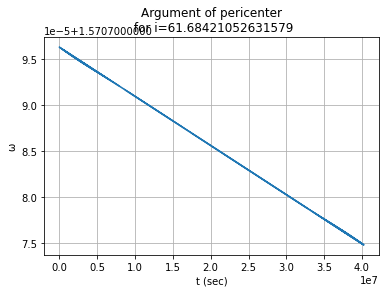

i = 61.68421052631579
da/dt = [ 4.75925252e-06 -7.59024836e-10  4.25392006e-09 ... -4.21341782e-09
  2.56234774e-10 -4.66116506e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 4.60249264e-11  8.84975768e-13  2.87312476e-13 ... -2.83650848e-13
 -8.74614647e-13 -4.50345117e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 6.69565496e-12 -6.89979983e-13 -1.84070450e-13 ...  1.81598787e-13
  6.77526270e-13 -6.58996458e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-1.75264015e-11 -1.21010977e-12 -4.62699614e-13 ... -6.92142280e-13
 -1.16655667e-12 -1.54119236e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72985660e-08 7.72985684e-08 ... 7.72985669e-08
 7.72985645e-08 7.72986944e-08] 

dw/dt = [-2.47222697e-12 -2.59954973e-13  2.85624823e-13 ...  2.86573582e-13
 -2.39278288e-13  1.96217172e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361916e-08 6.76361926e-08 ... 6.76361893e-08
 6.76361883e-08 6.76363544e-08] 



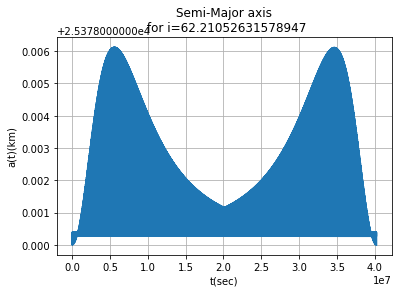

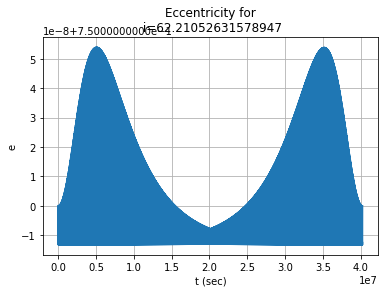

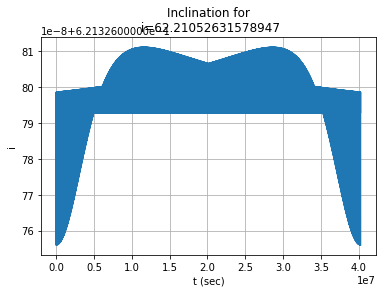

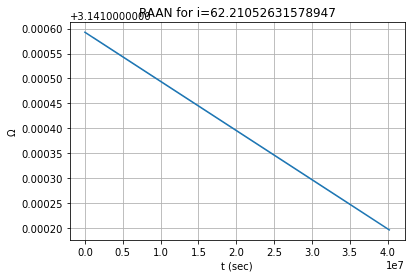

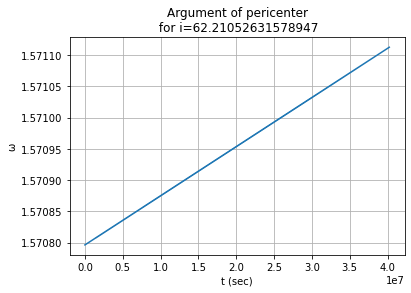

i = 62.21052631578947
da/dt = [ 7.75217436e-08 -2.23406231e-08 -2.03641168e-09 ...  2.04059361e-09
  2.23560273e-08 -7.75434785e-08]
From the averaged theory : da/dt = 0 

de/dt = [-2.64388260e-12  1.07501353e-13  7.37644724e-14 ... -7.38821622e-14
 -1.07426527e-13  2.64403945e-12]
From the averaged theory : de/dt = 0 

di/dt = [ 8.46429717e-12 -8.72237387e-13 -2.32692049e-13 ...  2.33067942e-13
  8.72491903e-13 -8.46526550e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-3.46752035e-11 -2.32644166e-12 -1.39677672e-12 ... -1.37557931e-12
 -2.32675641e-12 -3.45785171e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72986873e-08 7.72986888e-08 ... 7.72986827e-08
 7.72986812e-08 7.72986924e-08] 

dw/dt = [2.97984401e-11 5.64917173e-13 5.70104753e-13 ... 5.69693677e-13
 5.63704165e-13 2.97822492e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76363545e-08 6.76363556e-08 ... 6.76363424e-08
 6.76363412e-08 6.76363479e-08] 



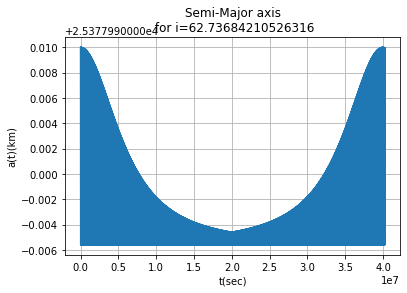

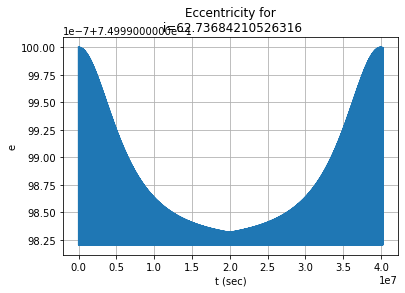

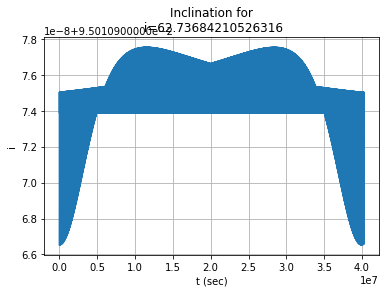

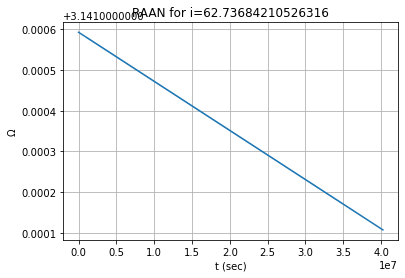

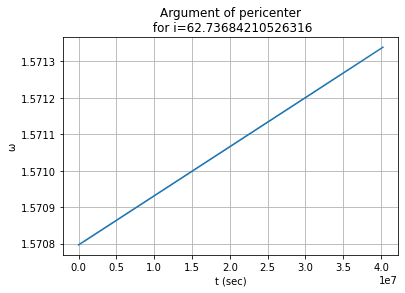

i = 62.73684210526316
da/dt = [-3.05799217e-06 -3.67945125e-08 -6.24971739e-09 ...  6.31592383e-09
  3.74598916e-08  3.05002107e-06]
From the averaged theory : da/dt = 0 

de/dt = [-3.52390940e-11 -4.13204677e-13 -6.92425292e-14 ...  6.99745812e-14
  4.20730139e-13  3.51471018e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 1.68885277e-12 -1.74034794e-13 -4.64282798e-14 ...  4.69759697e-14
  1.76264641e-13 -1.68200594e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-4.24165816e-11 -2.90099351e-12 -1.71069510e-12 ... -1.68820618e-12
 -2.86251334e-12 -4.56741306e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72987685e-08 7.72987694e-08 ... 7.72987603e-08
 7.72987594e-08 7.72986896e-08] 

dw/dt = [5.14112299e-11 1.11737066e-12 7.60605765e-13 ... 7.61848307e-13
 1.11919096e-12 5.54368648e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364636e-08 6.76364648e-08 ... 6.76364449e-08
 6.76364437e-08 6.76363415e-08] 



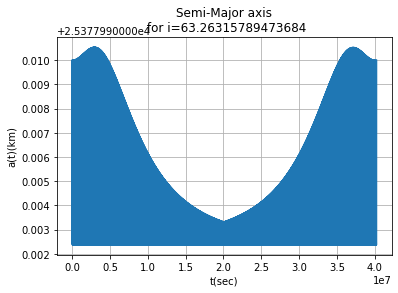

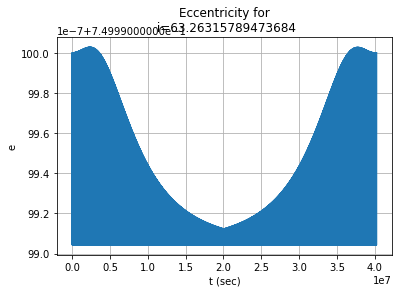

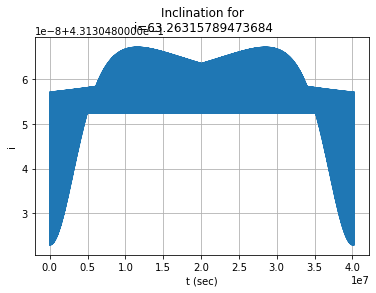

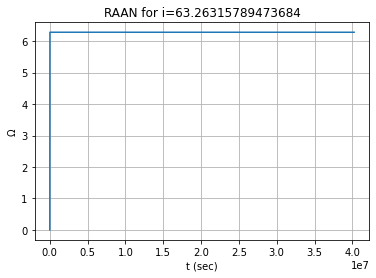

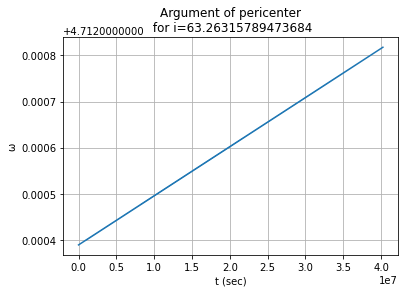

i = 63.26315789473684
da/dt = [-1.48222623e-06 -2.95306212e-08 -4.13213054e-09 ...  4.15854715e-09
  2.98389789e-08  1.48259121e-06]
From the averaged theory : da/dt = 0 

de/dt = [-1.88582257e-11 -1.51518988e-13  2.62614781e-15 ... -2.66199333e-15
  1.53847247e-13  1.88615580e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 6.79136371e-12 -6.99843284e-13 -1.86701409e-13 ...  1.87946269e-13
  7.04390257e-13 -6.78814791e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 1.24916117e-03 -2.63657833e-12 -1.56551668e-12 ... -1.53863802e-12
 -2.60581245e-12 -4.01503781e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72987277e-08 -7.72987289e-08 ... -7.72987213e-08
 -7.72987201e-08 -7.72986909e-08] 

dw/dt = [4.05496225e-11 8.39727907e-13 6.64877172e-13 ... 6.65023556e-13
 8.38217980e-13 4.18381681e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364087e-08 6.76364099e-08 ... 6.76363934e-08
 6.76363922e-08 6.76363446e-08] 



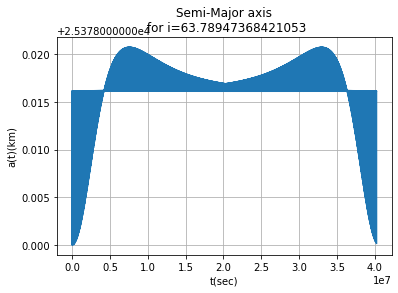

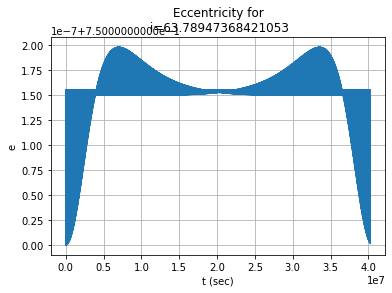

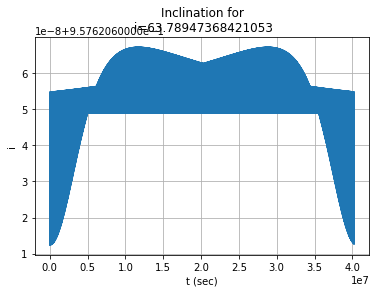

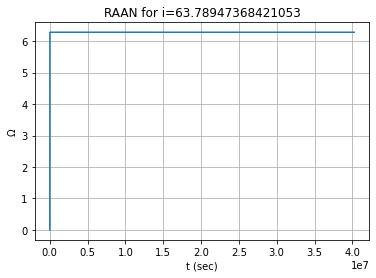

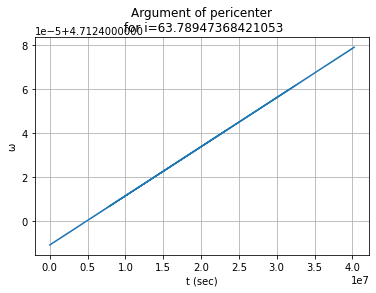

i = 63.78947368421053
da/dt = [ 3.21420485e-06 -7.88125203e-09  2.17795724e-09 ... -2.16692886e-09
  7.49020676e-09 -3.17977672e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 2.99634365e-11  6.28399456e-13  2.16840009e-13 ... -2.15079693e-13
 -6.24229854e-13 -2.96210180e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 8.41619846e-12 -8.67280375e-13 -2.31369827e-13 ...  2.29407108e-13
  8.56835711e-13 -8.35195031e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 1.24916119e-03 -1.55571973e-12 -8.25568573e-13 ... -9.71183138e-13
 -1.63872012e-12 -2.25415996e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72986060e-08 -7.72986081e-08 ... -7.72986051e-08
 -7.72986031e-08 -7.72986946e-08] 

dw/dt = [8.17761207e-12 1.22665839e-14 3.79500574e-13 ... 3.79536773e-13
 2.22644820e-14 9.77479077e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76362453e-08 6.76362464e-08 ... 6.76362398e-08
 6.76362387e-08 6.76363534e-08] 



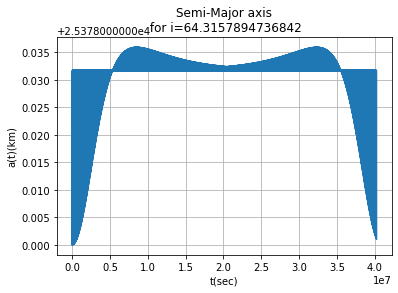

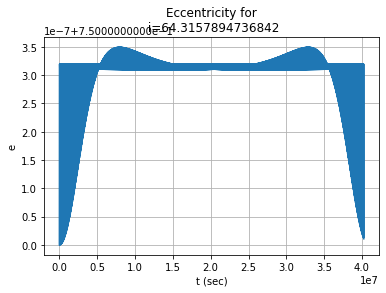

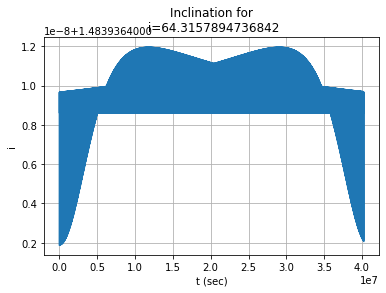

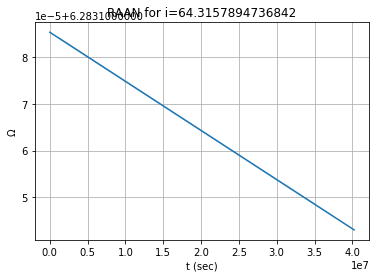

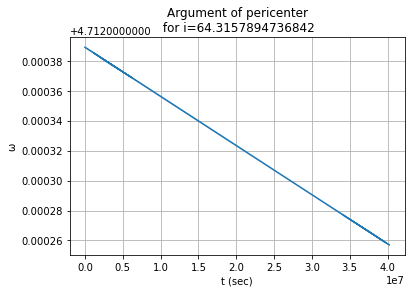

i = 64.3157894736842
da/dt = [ 6.29060110e-06  6.30018843e-09  6.31149960e-09 ... -6.22666687e-09
 -6.85411348e-09 -6.08083234e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 6.19440001e-11  1.13927929e-12  3.57159214e-13 ... -3.50938185e-13
 -1.12008525e-12 -5.98087099e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 1.54549594e-12 -1.59261642e-13 -4.24872703e-14 ...  4.17093960e-14
  1.55445949e-13 -1.50436083e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-4.18961123e-12  0.00000000e+00  0.00000000e+00 ... -1.45647408e-13
 -2.46916298e-13 -3.11532314e-12]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72985263e-08 -7.72985290e-08 ... -7.72985290e-08
 -7.72985264e-08 -7.72986930e-08] 

dw/dt = [-1.30276394e-11 -5.29760930e-13  1.92578375e-13 ...  1.94990090e-13
 -4.95291667e-13 -4.50073109e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361383e-08 6.76361393e-08 ... 6.76361392e-08
 6.76361382e-08 6.76363538e-08] 



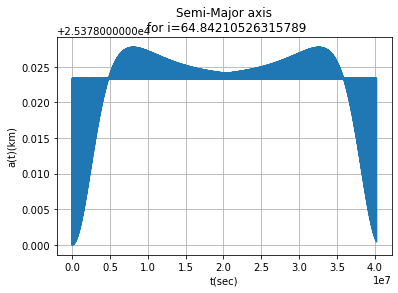

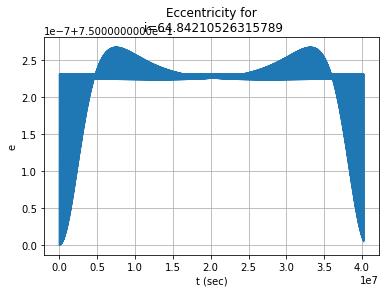

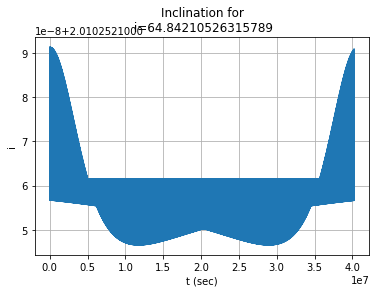

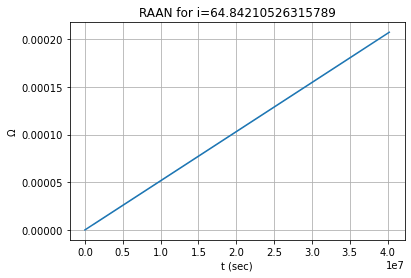

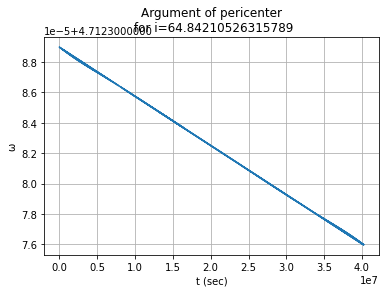

i = 64.84210526315789
da/dt = [ 4.64155693e-06 -1.30147381e-09  4.09608797e-09 ... -4.05815766e-09
  8.05303089e-10 -4.54988533e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 4.48014276e-11  8.65434110e-13  2.81940063e-13 ... -2.78449274e-13
 -8.55637645e-13 -4.38765603e-11]
From the averaged theory : de/dt = 0 

di/dt = [-6.88527207e-12  7.09519852e-13  1.89283236e-13 ... -1.86812632e-13
 -6.97036959e-13  6.78154476e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [1.80201996e-11 1.17901134e-12 8.93459029e-13 ... 7.17227779e-13
 1.20876349e-12 1.60206453e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72985690e-08 -7.72985714e-08 ... -7.72985698e-08
 -7.72985675e-08 -7.72986945e-08] 

dw/dt = [-1.66097242e-12 -2.39222931e-13  2.92791852e-13 ...  2.93640314e-13
 -2.19474698e-13  2.51105915e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361957e-08 6.76361967e-08 ... 6.76361931e-08
 6.76361921e-08 6.76363544e-08] 



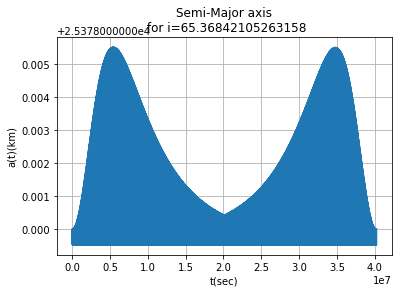

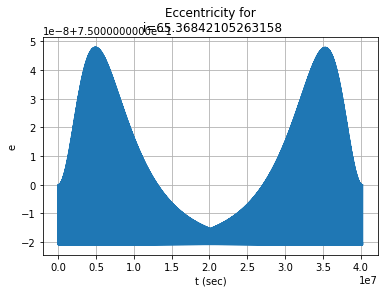

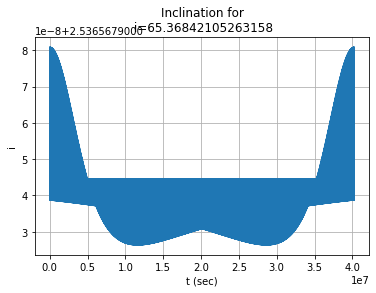

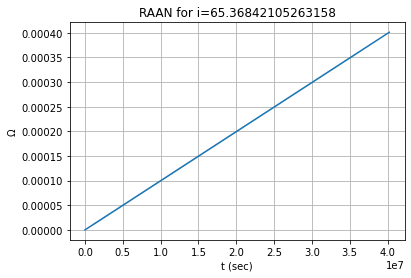

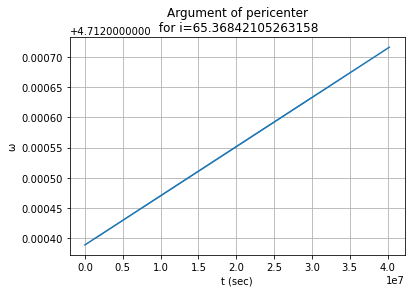

i = 65.36842105263158
da/dt = [-6.83322184e-08 -2.30129369e-08 -2.23261744e-09 ...  2.23862996e-09
  2.30525235e-08  6.83015648e-08]
From the averaged theory : da/dt = 0 

de/dt = [-4.16010553e-12  8.32813032e-14  6.71189912e-14 ... -6.72595701e-14
 -8.31210137e-14  4.16038089e-12]
From the averaged theory : de/dt = 0 

di/dt = [-8.36586038e-12  8.62093568e-13  2.29985911e-13 ... -2.30466029e-13
 -8.62843764e-13  8.36740527e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [3.49273901e-11 2.42834584e-12 1.38401193e-12 ... 1.39165967e-12
 2.35401066e-12 3.51062285e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72986911e-08 -7.72986925e-08 ... -7.72986863e-08
 -7.72986849e-08 -7.72986923e-08] 

dw/dt = [3.08037955e-11 5.90617793e-13 5.78950165e-13 ... 5.78532732e-13
 5.89249483e-13 3.08501107e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76363595e-08 6.76363607e-08 ... 6.76363472e-08
 6.76363460e-08 6.76363476e-08] 



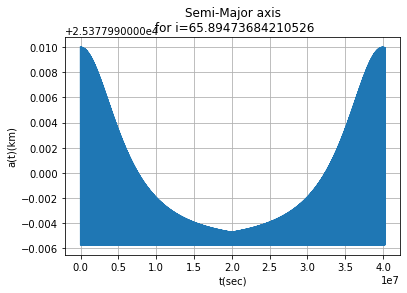

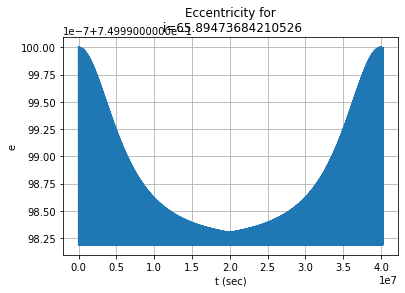

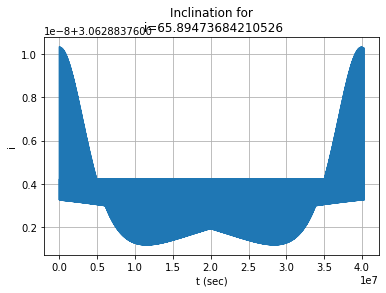

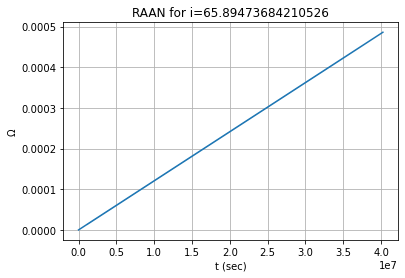

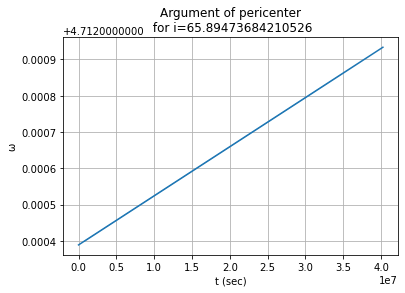

i = 65.89473684210526
da/dt = [-3.08477569e-06 -3.69180061e-08 -6.28572525e-09 ...  6.35267448e-09
  3.75900985e-08  3.07649601e-06]
From the averaged theory : da/dt = 0 

de/dt = [-3.55175223e-11 -4.17653141e-13 -7.04638152e-14 ...  7.12463688e-14
  4.25285235e-13  3.54221029e-11]
From the averaged theory : de/dt = 0 

di/dt = [-1.40172720e-12  1.44446760e-13  3.85344630e-14 ... -3.89925970e-14
 -1.46313287e-13  1.39592191e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [4.24165816e-11 2.80405744e-12 1.71422839e-12 ... 1.69058118e-12
 2.86676557e-12 4.57675562e-11]
From the averaged theory : dΩ/dt =  [-7.72986985e-08 -7.72987692e-08 -7.72987701e-08 ... -7.72987610e-08
 -7.72987601e-08 -7.72986896e-08] 

dw/dt = [5.15958477e-11 1.12208942e-12 7.62232190e-13 ... 7.63507619e-13
 1.12400071e-12 5.56803694e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364645e-08 6.76364657e-08 ... 6.76364458e-08
 6.76364445e-08 6.76363415e-08] 



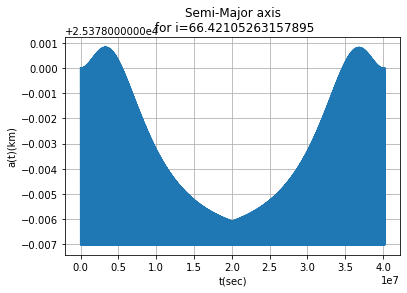

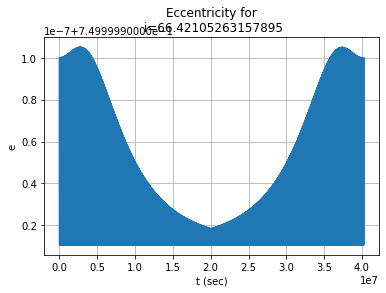

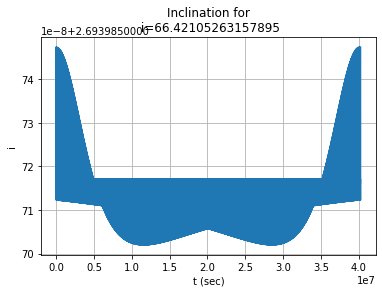

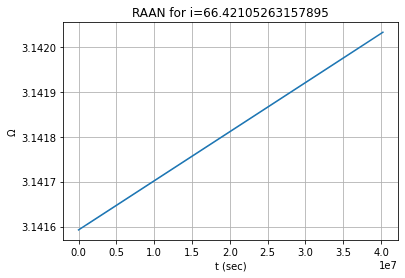

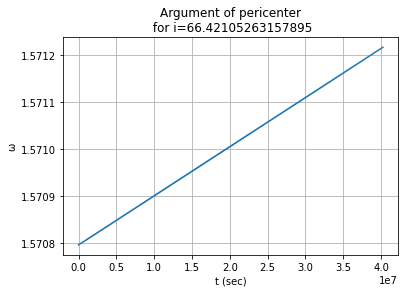

i = 66.42105263157895
da/dt = [-1.36290358e-06 -2.89804925e-08 -3.97193915e-09 ...  3.99651577e-09
  2.92637630e-08  1.36334965e-06]
From the averaged theory : da/dt = 0 

de/dt = [-1.76178080e-11 -1.31703413e-13  8.07140004e-15 ... -8.13896354e-15
  1.33761175e-13  1.76223022e-11]
From the averaged theory : de/dt = 0 

di/dt = [-6.97734640e-12  7.19008674e-13  1.91814141e-13 ... -1.93018939e-13
 -7.23337506e-13  6.97508363e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [3.83984218e-11 2.54417811e-12 1.57731083e-12 ... 1.52676432e-12
 2.58537124e-12 3.97287183e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72987246e-08 7.72987258e-08 ... 7.72987184e-08
 7.72987172e-08 7.72986910e-08] 

dw/dt = [3.97271439e-11 8.18709189e-13 6.57619558e-13 ... 6.57679550e-13
 8.17122716e-13 4.08663300e-11]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76364046e-08 6.76364058e-08 ... 6.76363895e-08
 6.76363883e-08 6.76363448e-08] 



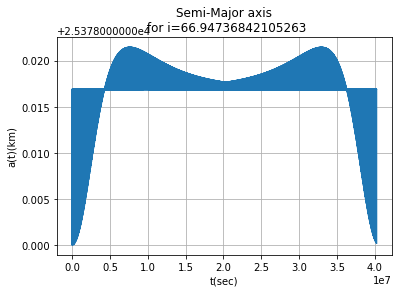

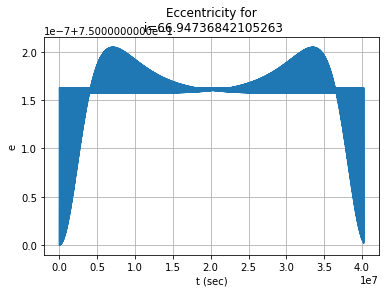

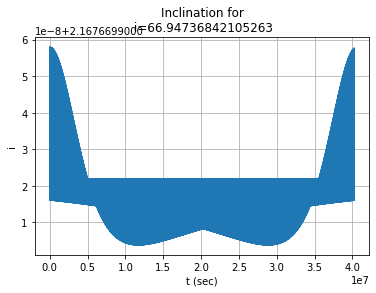

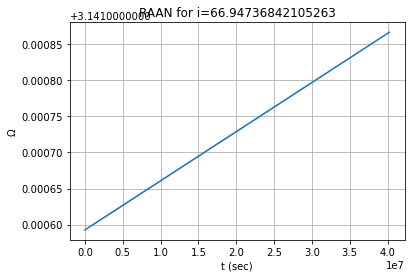

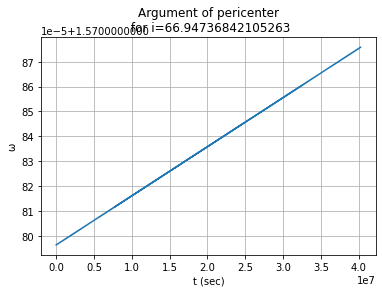

i = 66.94736842105263
da/dt = [ 3.35918664e-06 -7.21299940e-09  2.37273311e-09 ... -2.35947851e-09
  6.80902066e-09 -3.32051849e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 3.14705882e-11  6.52473276e-13  2.23453485e-13 ... -2.21523257e-13
 -6.47850020e-13 -3.10852512e-11]
From the averaged theory : de/dt = 0 

di/dt = [-8.31330193e-12  8.56677010e-13  2.28541143e-13 ... -2.26496094e-13
 -8.45875590e-13  8.24448092e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [2.40674846e-11 1.58854019e-12 8.41403641e-13 ... 9.48505020e-13
 1.60022238e-12 2.19295328e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72986023e-08 7.72986044e-08 ... 7.72986015e-08
 7.72985994e-08 7.72986946e-08] 

dw/dt = [ 7.17827409e-12 -1.32779396e-14  3.70693745e-13 ...  3.70781990e-13
 -2.41365716e-15  8.98530693e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76362403e-08 6.76362414e-08 ... 6.76362351e-08
 6.76362340e-08 6.76363535e-08] 



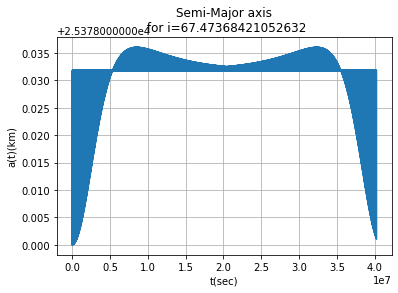

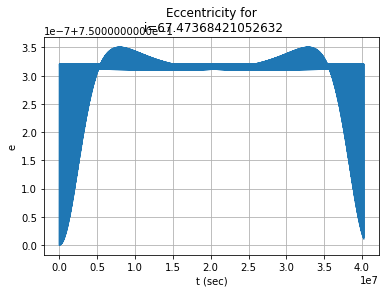

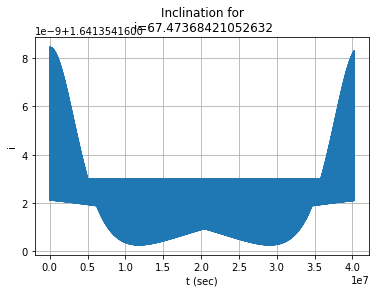

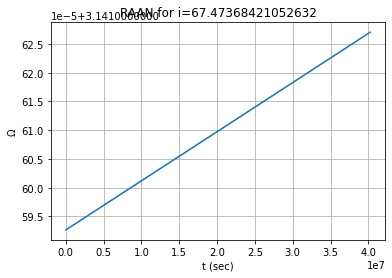

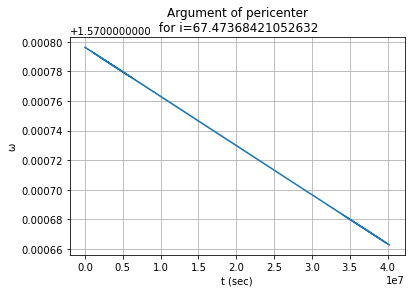

i = 67.47368421052632
da/dt = [ 6.31489304e-06  6.41226519e-09  6.34423468e-09 ... -6.25857886e-09
 -6.96626619e-09 -6.10289470e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 6.21965268e-11  1.14331564e-12  3.58266254e-13 ... -3.52009180e-13
 -1.12395381e-12 -6.00383288e-11]
From the averaged theory : de/dt = 0 

di/dt = [-1.25758672e-12  1.29592898e-13  3.45723854e-14 ... -3.39367013e-14
 -1.26475971e-13  1.22387136e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [ 0.00000000e+00  4.18961132e-12 -4.18961132e-12 ...  1.19481327e-13
  1.99130777e-13  2.53102457e-12]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72985257e-08 7.72985284e-08 ... 7.72985284e-08
 7.72985258e-08 7.72986930e-08] 

dw/dt = [-1.31950871e-11 -5.34041070e-13  1.91106987e-13 ...  1.93546027e-13
 -4.99336560e-13 -4.59325937e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361374e-08 6.76361385e-08 ... 6.76361384e-08
 6.76361374e-08 6.76363537e-08] 



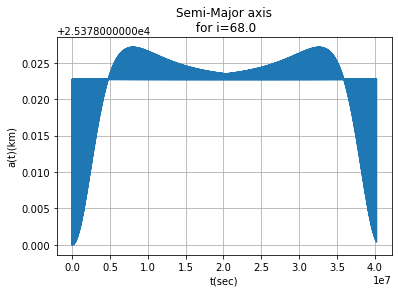

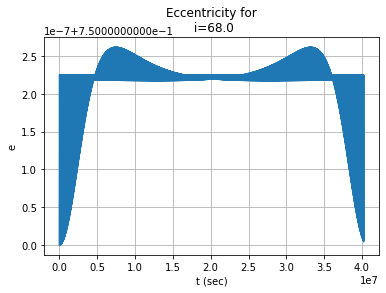

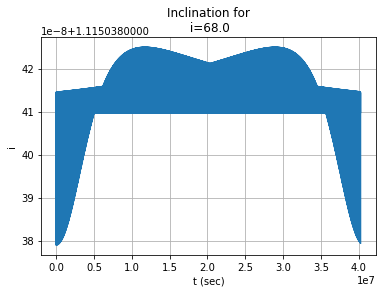

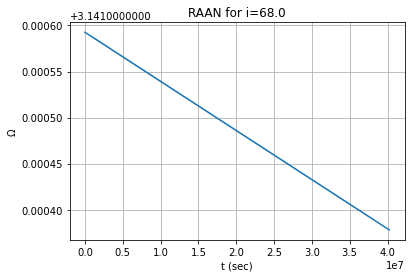

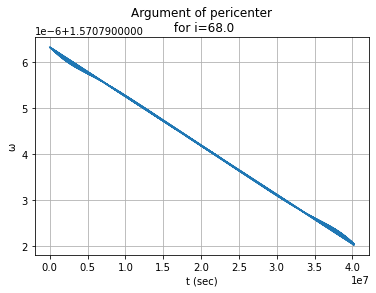

i = 68.0
da/dt = [ 4.52063838e-06 -1.85886259e-09  3.93360598e-09 ... -3.89836407e-09
  1.36948407e-09 -4.43526560e-06]
From the averaged theory : da/dt = 0 

de/dt = [ 4.35444230e-11  8.45353998e-13  2.76425040e-13 ... -2.73103944e-13
 -8.36124770e-13 -4.26838708e-11]
From the averaged theory : de/dt = 0 

di/dt = [ 7.06757072e-12 -7.28305553e-13 -1.94294722e-13 ...  1.91833918e-13
  7.15833343e-13 -6.96620361e-12]
From the averaged theory : di/dt = 0 

dΩ/dt = [-1.85008225e-11 -1.59184742e-12 -4.32149873e-13 ... -7.42050632e-13
 -1.25071506e-12 -1.66303245e-11]
From the averaged theory : dΩ/dt =  [7.72986985e-08 7.72985722e-08 7.72985745e-08 ... 7.72985728e-08
 7.72985705e-08 7.72986945e-08] 

dw/dt = [-8.27493990e-13 -2.17917802e-13  3.00138241e-13 ...  3.00893911e-13
 -1.99098728e-13  3.08285773e-12]
From the averaged theory : dw/dt =  [6.76363612e-08 6.76361999e-08 6.76362009e-08 ... 6.76361971e-08
 6.76361960e-08 6.76363544e-08] 



In [22]:
t0 = 0.0;
tmax = 1000*T;
IC = [ a0 , e0, np.deg2rad(i0), np.deg2rad(Ω0), np.deg2rad(w0), f0 ];
#ICCAR = kep2cart(IC,mu);
i1=np.linspace(58,68,20)
for j in i1:
    IC[2]=j
    ICCAR=kep2cart(IC,mu)
    # solve 2-body problem in cartesian coordinates
    sol = solve_ivp(rhs_2bp_pert, [t0, tmax], ICCAR ,t_eval=np.linspace(0,tmax,8000),method='DOP853',atol=1e-13,rtol=1e-13)
    celem = [];
   # print(len(sol.t))
   # print(len(sol.y[0]))
    for i in range(0, len(sol.t)):
        car = sol.y[:,i]
        coe = cart2kep(car,mu)
        celem.append(coe)
    solcoe = np.transpose(np.array(celem))
    plt.figure(1)
    plt.plot(sol.t,solcoe[0]) 
    plt.title("Semi-Major axis\n for i="+str(j))
    plt.xlabel('t(sec)')
    plt.ylabel('a(t)(km)')
    plt.grid() 
    plt.show()
    plt.figure(2)
    plt.plot(sol.t,solcoe[1])
    plt.title("Eccentricity for\n i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('e')
    plt.grid()
    plt.show()
    plt.figure(3)
    plt.plot(sol.t,solcoe[2])
    plt.title("Inclination for\n i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('i')
    plt.grid()
    plt.show()
    plt.figure(4)
    plt.plot(sol.t,solcoe[3])
    plt.title("RAAN for i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('Ω')
    plt.grid()
    plt.show()
    plt.figure(5)
    plt.plot(sol.t,solcoe[4])
    plt.title("Argument of pericenter\n for i="+str(j))
    plt.xlabel('t (sec)')
    plt.ylabel('ω')
    plt.grid()
    plt.show()
    
    # Averaged theory
    w_dot=((3*J2*(R_earth**2)*np.sqrt(mu/solcoe[0]**3))/(2*(solcoe[0]**2)*(1-solcoe[1]**2)))*(2-(5/2)*(np.sin(solcoe[3]))**2)
    Om_dot=-(3*np.sqrt(mu/solcoe[0]**3)*J2*(R_earth**2)*np.cos(solcoe[3]))/(2*(solcoe[0]**2)*(1-solcoe[1]**2)**2)
    da=diff(solcoe[0])/diff(sol.t)
    de=diff(solcoe[1])/diff(sol.t)
    di=diff(solcoe[2])/diff(sol.t)
    dOm=diff(solcoe[3])/diff(sol.t)
    dw=diff(solcoe[4])/diff(sol.t)
    
    print("i = "+str(j))
    print("da/dt = "+str(da))
    print("From the averaged theory : da/dt = 0 \n")
    print("de/dt = "+str(de))
    print("From the averaged theory : de/dt = 0 \n")
    print("di/dt = "+str(di))
    print("From the averaged theory : di/dt = 0 \n")
    print("dΩ/dt = "+str(dOm))
    print("From the averaged theory : dΩ/dt =  "+str(Om_dot),"\n")
    print("dw/dt = "+str(dw))
    print("From the averaged theory : dw/dt =  "+str(w_dot),"\n")
    
    
    

